# Employee Attrition Case - Final Project_Hash Analytics

## Exploratory Data Analysis

### Import Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load Datasets

In [2]:
currentEmp = pd.read_excel('employeeAttrition.xlsx', sheet_name='CurrentEmployees')
churnedEmp = pd.read_excel('employeeAttrition.xlsx', sheet_name='ChurnedEmployees')

In [3]:
churnedEmp

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low


In [4]:
currentEmp

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high
11424,14208,0.74,0.95,5,266,10,0,1,management,high
11425,14209,0.85,0.54,3,185,10,0,1,management,high
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high


### Concatenate Datasets

In [5]:
# Create an additional column, 'churned' for both datasets
churnedEmp['churned'] = [1] * churnedEmp.shape[0]
currentEmp['churned'] = [0] * currentEmp.shape[0]

In [6]:
dataset= currentEmp.append(churnedEmp, ignore_index=True, sort=False)
dataset

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,churned
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low,1
14995,14996,0.37,0.48,2,160,3,0,0,support,low,1
14996,14997,0.37,0.53,2,143,3,0,0,support,low,1
14997,14998,0.11,0.96,6,280,4,0,0,support,low,1


In [7]:
dataset['Work_accident'] = dataset['Work_accident'].replace({0:'No',1:'Yes'}) 
dataset['promotion_last_5years'] = dataset['promotion_last_5years'].replace({0:'No',1:'Yes'}) 

In [8]:
dataset.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident             object
promotion_last_5years     object
dept                      object
salary                    object
churned                    int64
dtype: object

In [9]:
dataset.shape

(14999, 11)

In [10]:
dataset.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
churned                  0
dtype: int64

### Univariate Analysis

In [11]:
num_cols = ['satisfaction_level', 'last_evaluation',
       'average_montly_hours']

cat_cols = ['Work_accident','time_spend_company','number_project','promotion_last_5years','dept', 'salary', 'churned']

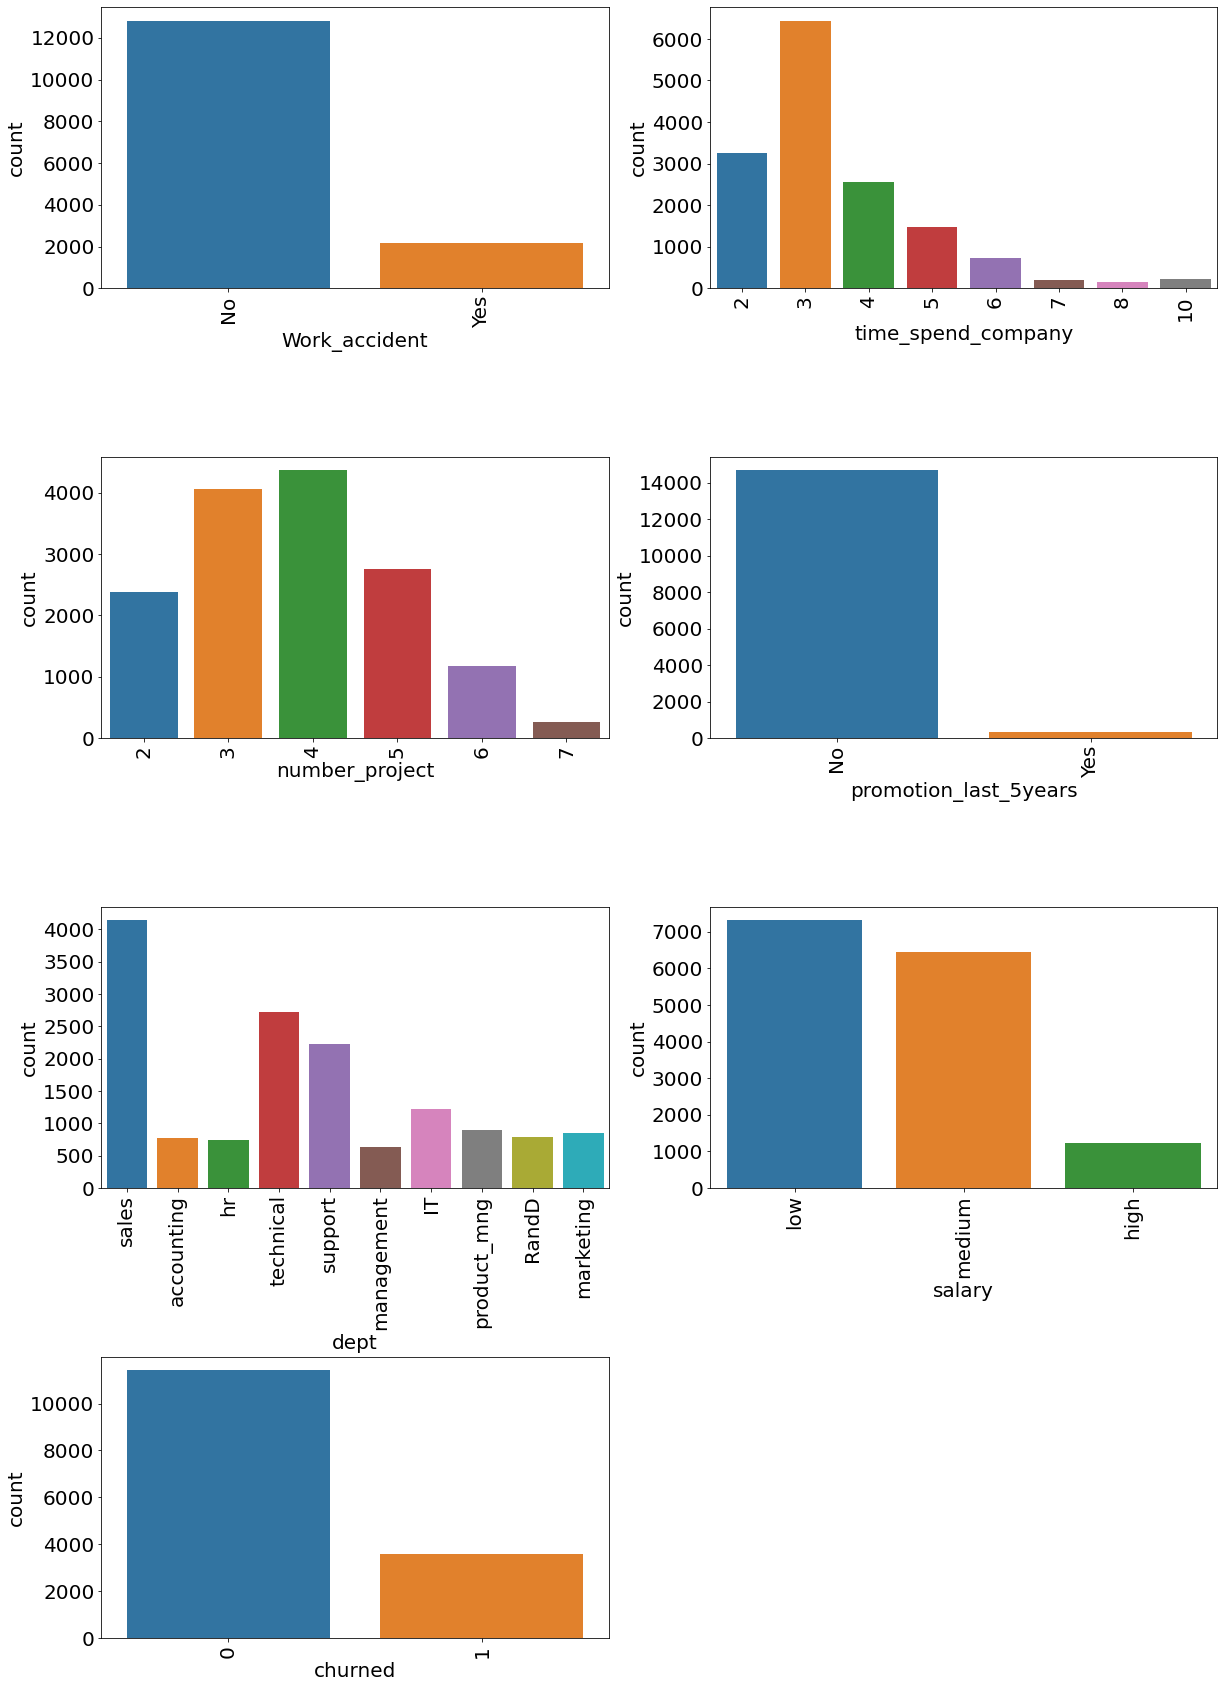

In [12]:
rowCnt = 4
colCnt = 2     # cols:  overall, no disease, disease
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(20,30))

for i in cat_cols:
    # OVERALL subplots
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.subplots_adjust(hspace=0.6, wspace=0.2)
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)

    sns.countplot(dataset[i])
    subCnt = subCnt + 1
plt.savefig('countplots.png')

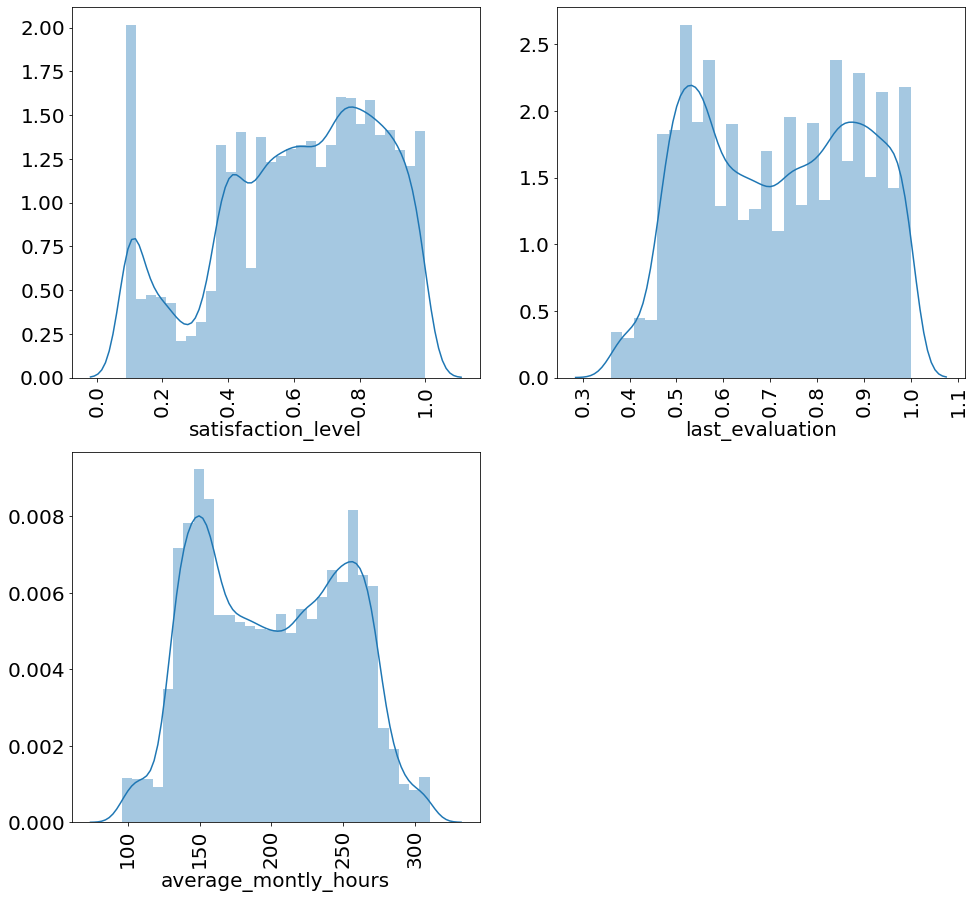

In [13]:
rowCnt = 2
colCnt = 2     # cols:  overall, no disease, disease
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(16,15))

for i in num_cols:
    # OVERALL subplots
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.subplots_adjust(hspace=0.2, wspace=0.19)
    plt.xlabel(i, fontsize=20)
    plt.xticks(fontsize=20,rotation=90)
    plt.yticks(fontsize=20)
    #plt.hist(dataset[i])
    sns.distplot(dataset[i])
    subCnt = subCnt + 1
plt.savefig('distributionplots.png')

### Bivarite Analysis

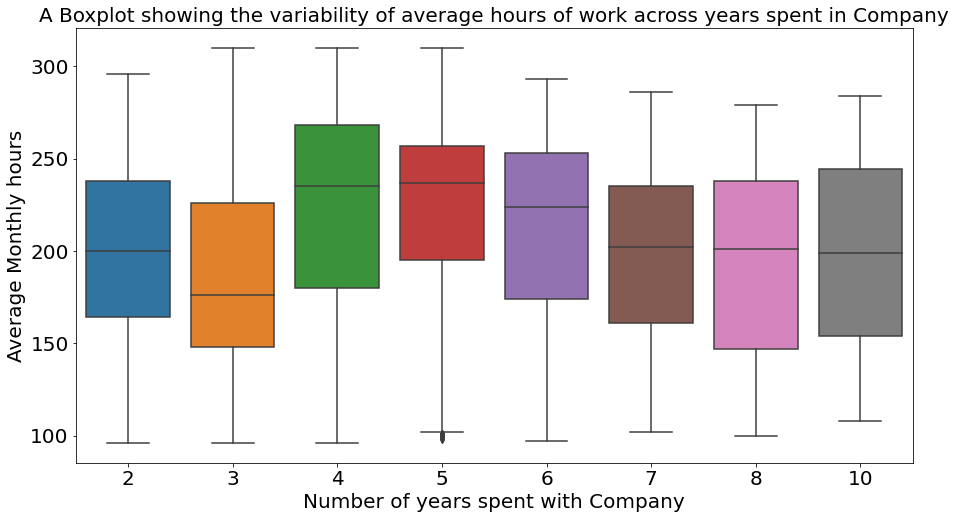

In [14]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['time_spend_company'],y=dataset['average_montly_hours'])
plt.xlabel('Number of years spent with Company',fontsize=20)
plt.ylabel('Average Monthly hours',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of average hours of work across years spent in Company',size=20)
plt.savefig('years_avg_Monthly_hours.png')

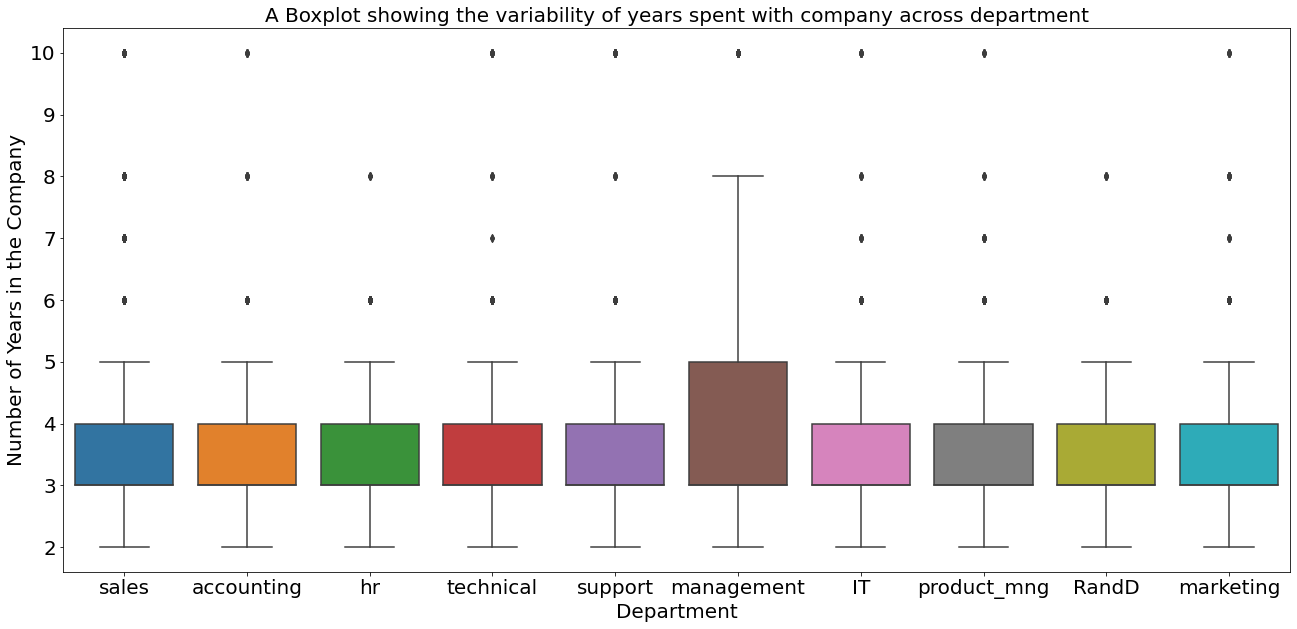

In [15]:
fig = plt.figure(figsize=(22,10))
sns.boxplot(x=dataset['dept'],y=dataset['time_spend_company'])
plt.xlabel('Department',fontsize=20)
plt.ylabel('Number of Years in the Company',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of years spent with company across department',size=20)
plt.savefig('years_dept.png')

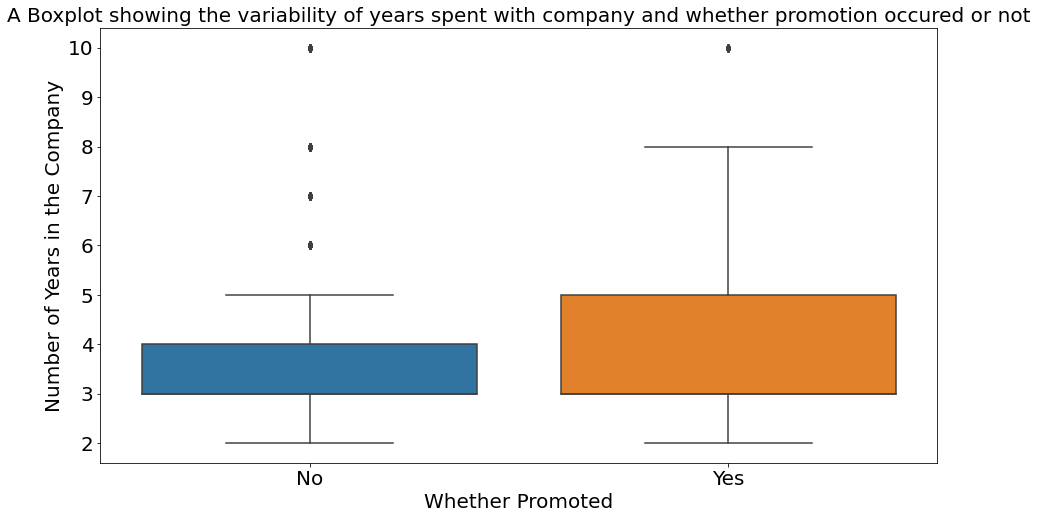

In [16]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['promotion_last_5years'],y=dataset['time_spend_company'])
plt.xlabel('Whether Promoted',fontsize=20)
plt.ylabel('Number of Years in the Company',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of years spent with company and whether promotion occured or not',size=20)
plt.savefig('year_promotion.png')

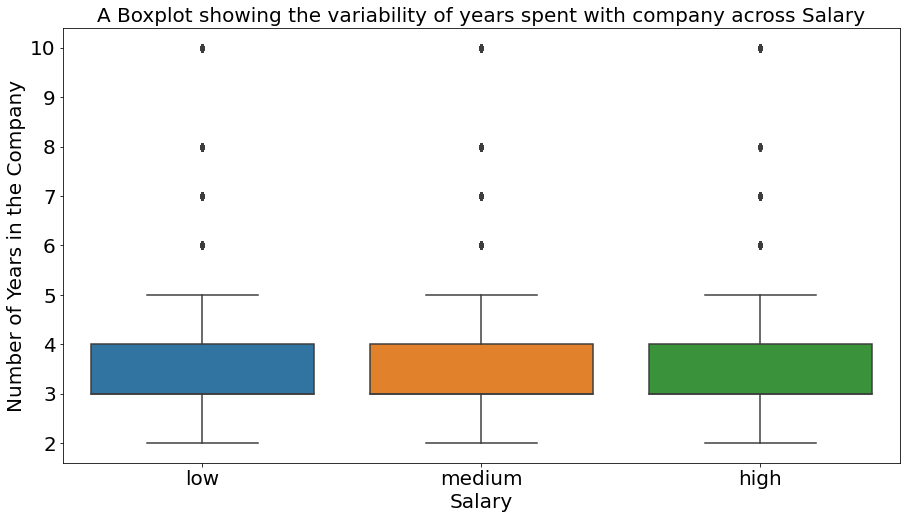

In [17]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['salary'],y=dataset['time_spend_company'])
plt.xlabel('Salary',fontsize=20)
plt.ylabel('Number of Years in the Company',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of years spent with company across Salary',size=20)
plt.savefig('year_salary.png')

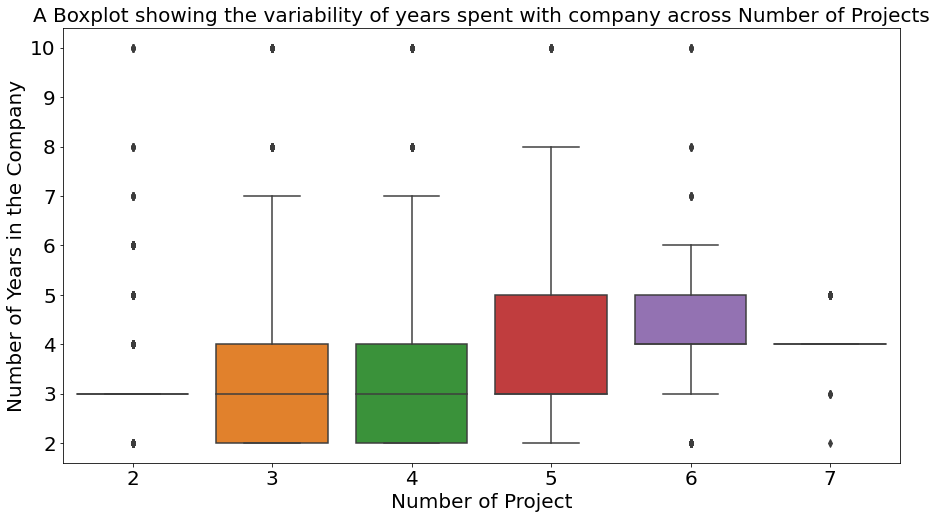

In [18]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['number_project'],y=dataset['time_spend_company'])
plt.xlabel('Number of Project',fontsize=20)
plt.ylabel('Number of Years in the Company',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of years spent with company across Number of Projects',size=20)
plt.savefig('year_projects.png')

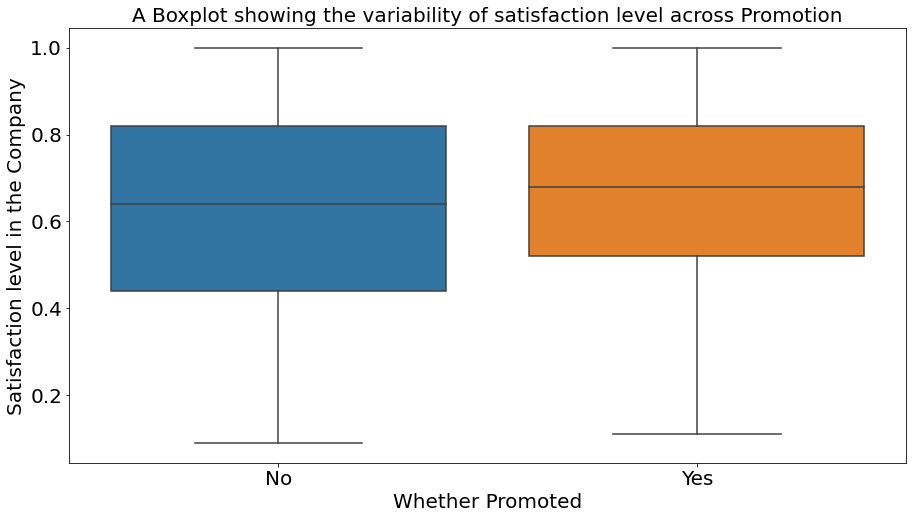

In [19]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['promotion_last_5years'],y=dataset['satisfaction_level'])
plt.xlabel('Whether Promoted',fontsize=20)
plt.ylabel('Satisfaction level in the Company',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of satisfaction level across Promotion',size=20)
plt.savefig('satisfaction_promotion.png')

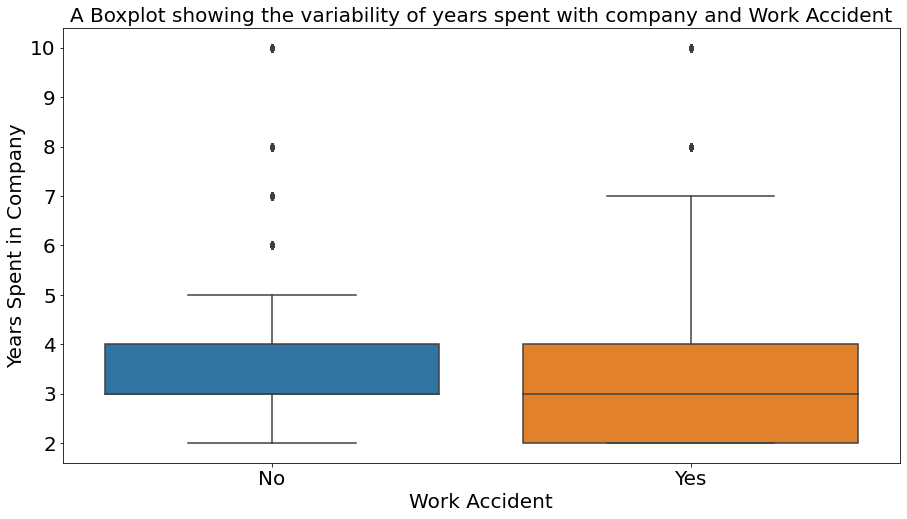

In [20]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['Work_accident'],y=dataset['time_spend_company'])
plt.xlabel('Work Accident',fontsize=20)
plt.ylabel('Years Spent in Company',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of years spent with company and Work Accident',size=20)
plt.savefig('accident_years.png')

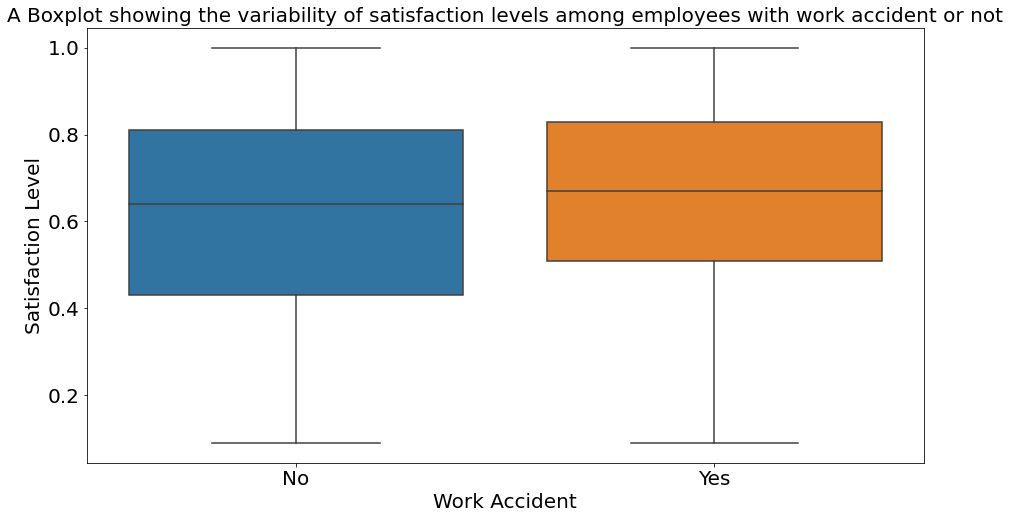

In [21]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['Work_accident'],y=dataset['satisfaction_level'])
plt.xlabel('Work Accident',fontsize=20)
plt.ylabel('Satisfaction Level',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of satisfaction levels among employees with work accident or not',size=20)
plt.savefig('satisfaction_accident.png')

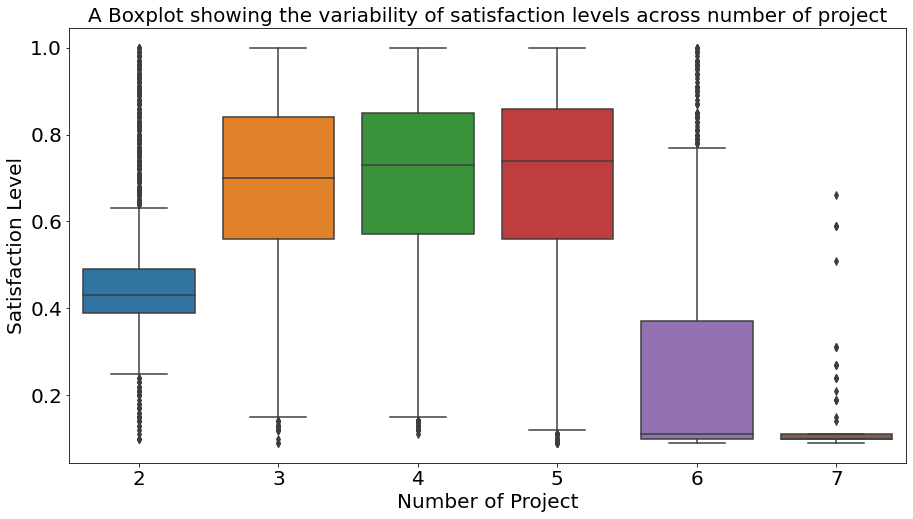

In [22]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x=dataset['number_project'],y=dataset['satisfaction_level'])
plt.xlabel('Number of Project',fontsize=20)
plt.ylabel('Satisfaction Level',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('A Boxplot showing the variability of satisfaction levels across number of project',size=20)
plt.savefig('satisfaction_project.png')

In [23]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

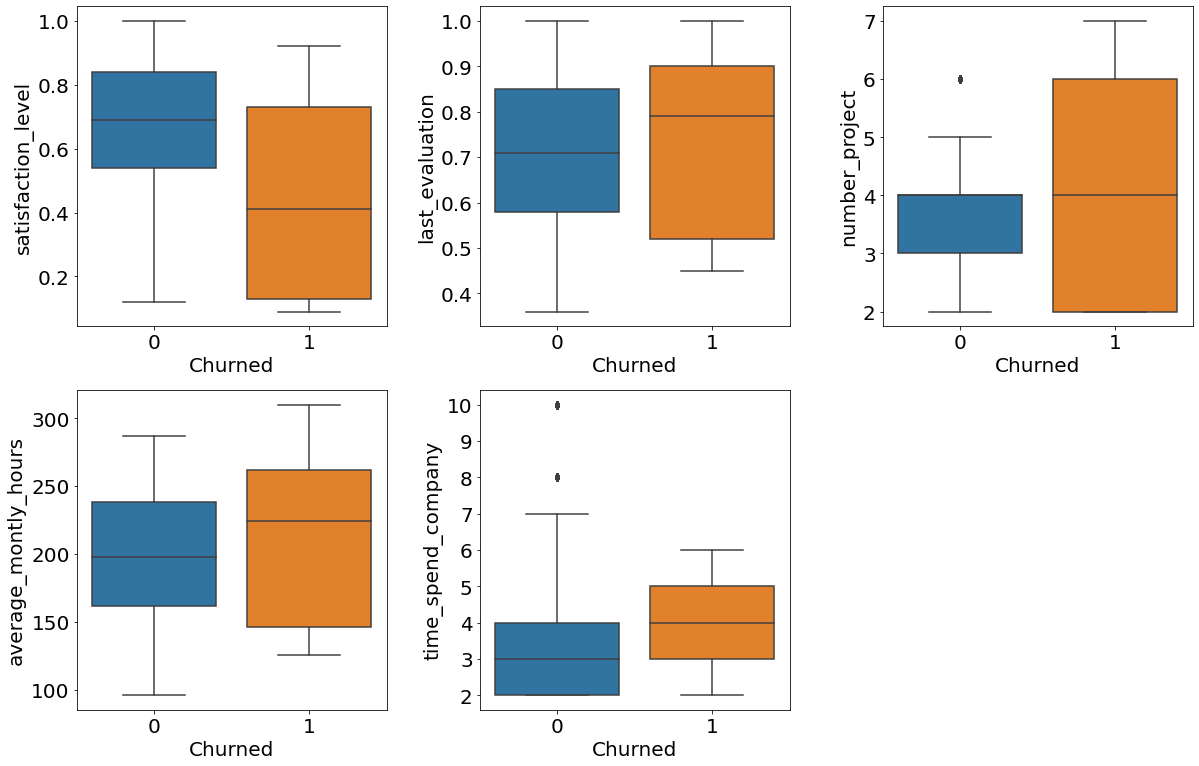

In [24]:
fig = plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=dataset['churned'],y=dataset[cols[i]])
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    plt.ylabel(cols[i],fontsize=20)
    plt.xlabel('Churned',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
plt.savefig('churned_others.png')
plt.show()

    
    

In [25]:
dataset.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,churned
0,2001,0.58,0.74,4,215,3,No,No,sales,low,0
1,2002,0.82,0.67,2,202,3,No,No,sales,low,0
2,2003,0.45,0.69,5,193,3,No,No,sales,low,0
3,2004,0.78,0.82,5,247,3,No,No,sales,low,0
4,2005,0.49,0.60,3,214,2,No,No,sales,low,0


In [26]:
data_model = dataset.iloc[:,1:]
data_model

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,churned
0,0.58,0.74,4,215,3,No,No,sales,low,0
1,0.82,0.67,2,202,3,No,No,sales,low,0
2,0.45,0.69,5,193,3,No,No,sales,low,0
3,0.78,0.82,5,247,3,No,No,sales,low,0
4,0.49,0.60,3,214,2,No,No,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,No,No,support,low,1
14995,0.37,0.48,2,160,3,No,No,support,low,1
14996,0.37,0.53,2,143,3,No,No,support,low,1
14997,0.11,0.96,6,280,4,No,No,support,low,1


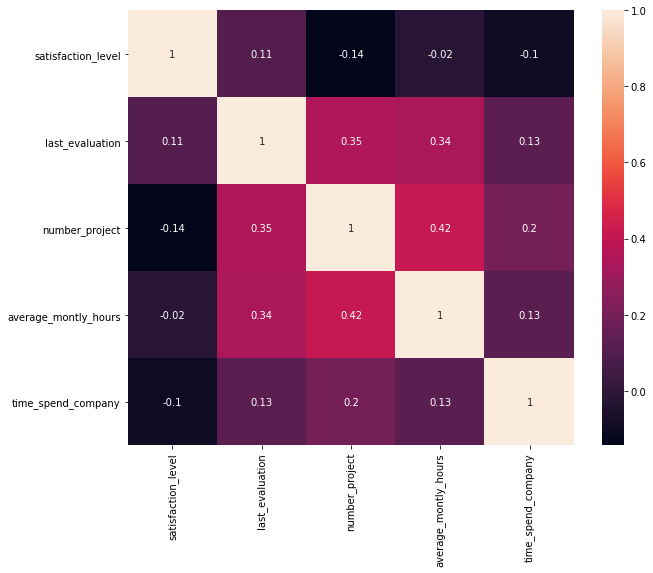

In [27]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(data_model[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr(),annot=True);

## Preprocessing 

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cols = ['Work_accident','promotion_last_5years','dept','salary']
for i in cols:
    
    data_model[i] = lb_make.fit_transform(data_model[i])


In [29]:
curr_employees = currentEmp.copy().iloc[:,1:]
for i in cols:
    
    curr_employees[i] = lb_make.fit_transform(curr_employees[i])


In [30]:
curr_employees

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,churned
0,0.58,0.74,4,215,3,0,0,7,1,0
1,0.82,0.67,2,202,3,0,0,7,1,0
2,0.45,0.69,5,193,3,0,0,7,1,0
3,0.78,0.82,5,247,3,0,0,7,1,0
4,0.49,0.60,3,214,2,0,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,4,0,0
11424,0.74,0.95,5,266,10,0,1,4,0,0
11425,0.85,0.54,3,185,10,0,1,4,0,0
11426,0.33,0.65,3,172,10,0,1,5,0,0


### Standardization

In [31]:
from sklearn.preprocessing import MinMaxScaler
ml_data = data_model.iloc[:,:-1]
scale = MinMaxScaler()
ml_data = scale.fit_transform(ml_data.iloc[:,:])
cols = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','dept','salary']
ml_data = pd.DataFrame(ml_data, columns = cols)
ml_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.538462,0.593750,0.4,0.556075,0.125,0.0,0.0,0.777778,0.5
1,0.802198,0.484375,0.0,0.495327,0.125,0.0,0.0,0.777778,0.5
2,0.395604,0.515625,0.6,0.453271,0.125,0.0,0.0,0.777778,0.5
3,0.758242,0.718750,0.6,0.705607,0.125,0.0,0.0,0.777778,0.5
4,0.439560,0.375000,0.2,0.551402,0.000,0.0,0.0,0.777778,0.5


### Feature Engineering

In [32]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier# Sequential Forward Selection(sfs)

X = ml_data
y = data_model['churned']
sfs = SFS(DecisionTreeClassifier(),
           k_features=(3,9),
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 0)

In [33]:
sfs.fit(X, y)
sfs.k_feature_names_ 

('satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'dept')

/Users/user/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


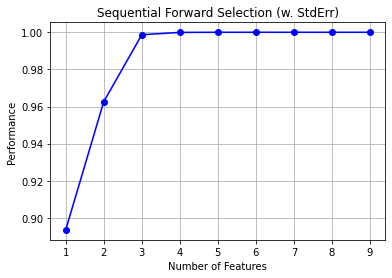

In [34]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [35]:
sfs1 = SFS(DecisionTreeClassifier(),
           k_features=(3,9),
           forward=True,
           floating=True,
           scoring = 'accuracy',
           cv = 0)

sfs1.fit(X, y)
sfs1.k_feature_names_ 

('satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'dept')

/Users/user/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


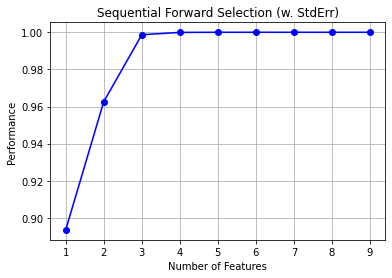

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## Modelling

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=0)
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

In [39]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[3425    4]
 [  31 1040]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       1.00      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

0.9922222222222222


### Saving and Loading the model

In [40]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(rf) 
  
# Load the pickled model 
rf_from_pickle = pickle.loads(saved_model) 
  

In [41]:
# Use the loaded pickled model to make predictions 
result = rf_from_pickle.predict_proba(curr_employees.iloc[:,:-1]) 


### Joining the predicted values to the original DataFrame

In [42]:
result = [i[1] for i in result]
currentEmp

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,churned
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high,0
11424,14208,0.74,0.95,5,266,10,0,1,management,high,0
11425,14209,0.85,0.54,3,185,10,0,1,management,high,0
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,0


In [43]:
currentEmp = currentEmp.drop('churned', axis=1)

currentEmp['likely_to_churn'] = result


In [44]:
currentEmp.sort_values(by=['likely_to_churn'],ascending=False)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,likely_to_churn
7827,9828,0.54,0.53,3,203,2,0,0,support,low,0.80
1247,3248,0.67,0.61,3,202,2,0,0,technical,medium,0.80
1207,3208,0.57,0.60,3,218,3,0,0,sales,low,0.80
7917,9918,0.63,0.63,5,252,2,0,0,product_mng,low,0.80
6609,8610,0.58,0.60,4,147,3,0,0,technical,medium,0.80
...,...,...,...,...,...,...,...,...,...,...,...
5922,7923,0.48,0.94,3,185,2,1,0,IT,medium,0.25
6305,8306,0.57,0.81,4,200,3,1,0,IT,medium,0.25
7452,9453,0.49,0.95,2,181,4,1,0,IT,low,0.25
6460,8461,0.56,0.84,4,149,4,1,0,IT,medium,0.25


## Final Action

In [45]:
currentEmp['State'] = np.where(currentEmp['likely_to_churn'] >= 0.5, 'Likely to Churn', 'Unlikely to churn')

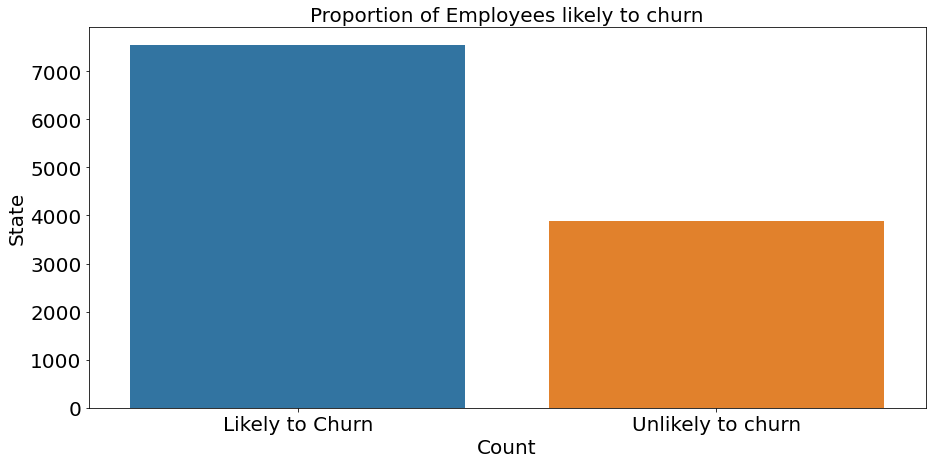

In [46]:
fig = plt.figure(figsize=(15,7))
sns.countplot(currentEmp['State'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('State',fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.title('Proportion of Employees likely to churn',size=20)
plt.savefig('likely_churning.png')
plt.show()

In [47]:
currentEmp.to_csv('final_prediction.csv', index=False)